In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geopandas as geopd
from shapely.geometry import Point

In [4]:
CAMEO_code = pd.read_csv('Data/cameo_code.csv',error_bad_lines=False)

In [5]:
CAMEO_code['case_clean'] = CAMEO_code[CAMEO_code.columns[1:]].apply(lambda x: ' '.join(x.dropna()),axis=1)

In [6]:
CAMEO_code = CAMEO_code[['CAMEO_code','CAMEO_case', 'case_clean']]

In [7]:
CAMEO_code_case = CAMEO_code.set_index(CAMEO_code.CAMEO_case)

In [8]:
protest_codes = CAMEO_code_case.loc[CAMEO_code_case.iloc[:,1].str.contains(r'(protest|Protest|Demonstrate|demonstrate)')] ["CAMEO_code"]

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [10]:
ICEWS_turkey_2013 = pd.read_csv("Data/ICEWS_Turkey_all_events.csv")

In [11]:
len(ICEWS_turkey_2013)

13080

In [12]:
ICEWS_turkey_2013["Event_date_dt"] = pd.to_datetime(ICEWS_turkey_2013["Event Date"])

In [13]:
ICEWS_turkey_2013_dt = ICEWS_turkey_2013.set_index(ICEWS_turkey_2013["Event_date_dt"])

In [14]:
len(ICEWS_turkey_2013_dt.resample("D"))

365

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


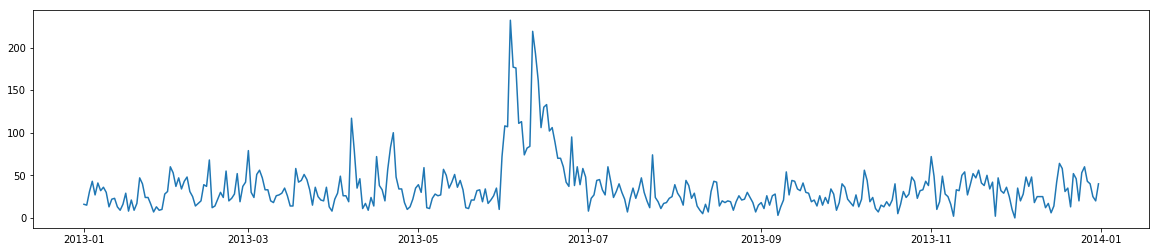

In [15]:
plt.figure(figsize=(20,4))

plt.plot(ICEWS_turkey_2013_dt['Intensity'].resample("D", how='count'))
plt.show()

In [16]:
begin = pd.Timestamp('2013-05-31')
end = pd.Timestamp('2013-07-01')

ICEWS_Gezi = ICEWS_turkey_2013_dt[(ICEWS_turkey_2013_dt['Event_date_dt'] > begin) & (ICEWS_turkey_2013_dt['Event_date_dt'] < end)]

In [17]:
ICEWS_Gezi_locations = ICEWS_Gezi [ICEWS_Gezi["City"].isin (['Taksim Square', 'Taksim', 'Gezi Park'])]

In [18]:
len(ICEWS_Gezi_locations)

878

In [19]:
ICEWS_Gezi_locations_cameo_codes = ICEWS_Gezi_locations['CAMEO_code'].unique()

In [20]:
CAMEO_code_case[CAMEO_code_case['CAMEO_code'].isin(ICEWS_Gezi_locations_cameo_codes)]

,CAMEO_code,CAMEO_case,case_clean
CAMEO_case,,,
Make statement,10,Make statement,Make statement not specified below 011 Declin...
Make pessimistic comment,12,Make pessimistic comment,Make pessimistic comment
Engage in symbolic act,17,Engage in symbolic act,Engage in symbolic act
Make an appeal or request,20,Make an appeal or request,Make an appeal or request not specified below
Express intent to cooperate,30,Express intent to cooperate,Express intent to cooperate not specified below
Express intent to engage in diplomatic cooperation (such as policy support) 033,32,Express intent to engage in diplomatic coopera...,Express intent to engage in diplomatic coopera...
Express intent to meet or negotiate 037,36,Express intent to meet or negotiate 037,Express intent to meet or negotiate 037 Expres...
Consult,40,Consult,Consult not specified below 041 Discuss by te...
Make a visit,42,Make a visit,Make a visit


In [21]:
ICEWS_Gezi_locations = ICEWS_Gezi_locations.merge(CAMEO_code_case,on='CAMEO_code')

In [22]:
ICEWS_Gezi_protest =  ICEWS_Gezi_locations [ICEWS_Gezi_locations["CAMEO_code"].isin (protest_codes.values)]

In [23]:
len(ICEWS_Gezi_protest)

90

In [24]:
ICEWS_Gezi_protest["Event_date_dt"] = pd.to_datetime(ICEWS_Gezi_protest["Event Date"])

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
ICEWS_Gezi_protest_dt = ICEWS_Gezi_protest.set_index(ICEWS_Gezi_protest["Event_date_dt"])

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


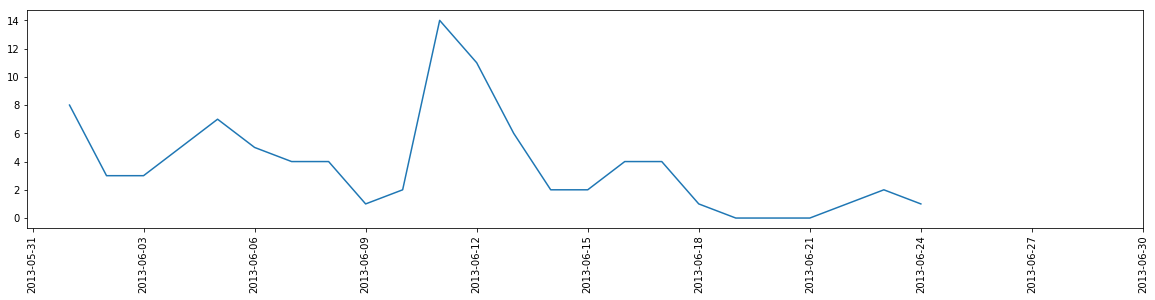

In [26]:
plt.figure(figsize=(20,4))


ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
#
plt.plot(ICEWS_Gezi_protest_dt['Intensity'].resample("D", how='count'))
plt.xticks(ticks,ticks, rotation='vertical')
plt.show()